In [217]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

plt.style.use('ggplot')

In [57]:
df = pd.read_csv(r"C:\Users\YangWang\Desktop\Text_Classifier_for_UtaPass_and_KKBOX\data\reviews_kkstream.csv")
# create the label
df["label"] = df["Reviewer Ratings"].apply(lambda x: 0 if int(x) <= 3 else 1)
# select only relevant columns
df = df[["Review Body", "label"]]
df.columns = ["content", "label"]
df.sample(5)

,content,label
887,TheBeachBoysアルバムsunflowerSlipOnThrough含ま聞き残念,0
411,アンインストールずっと残る,0
1403,ダウンロード,0
1868,最高歌詞見える良い,1
1046,リクエスト,0


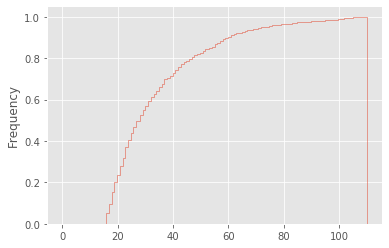

In [186]:
import matplotlib.pyplot as plt
df["length"] = df["content"].map(len)
df["length"].plot.hist(bins=300, density=True, cumulative=True, histtype='step', range=(0, 110))
plt.show()
# plt.savefig(r'C:\Users\YangWang\Desktop\Text_Classifier_for_UtaPass_and_KKBOX\image\cumulative_percentage.png', 
#             bbox_inches='tight')

In [59]:
df = df[df["length"] >= 16]

In [60]:
text_len = df["length"].values
max_len = text_len.max()

len_sum = [0] * max_len
for i in text_len:
    len_sum[i-1] += 1
    
len_cum = [len_sum[0]] + [0] * (max_len-1)
for i in range(1, max_len):
    len_cum[i] += len_sum[i] + len_cum[i-1]

print('Cumulative %   # Words  # Comments')
for i in range(max_len):
    len_cum[i] /= len(text_len)
    if len_sum[i] != 0:
        if (len_cum[i] >= 0.8 and len_cum[i-1] < 0.8):
            print(' %.5f   \t  %d \t    %d'%(len_cum[i]*100, i, len_sum[i]))
        if (len_cum[i] >= 0.85 and len_cum[i-1] < 0.85):
            print(' %.5f   \t  %d \t    %d'%(len_cum[i]*100, i, len_sum[i]))
        if (len_cum[i] >= 0.9 and len_cum[i-1] < 0.9):
            print(' %.5f   \t  %d \t    %d'%(len_cum[i]*100, i, len_sum[i]))
        if (len_cum[i] >= 0.92 and len_cum[i-1] < 0.92):
            print(' %.5f   \t  %d \t    %d'%(len_cum[i]*100, i, len_sum[i]))
        if (len_cum[i] >= 0.95 and len_cum[i-1] < 0.95):
            print(' %.5f   \t  %d \t    %d'%(len_cum[i]*100, i, len_sum[i]))

Cumulative %   # Words  # Comments
 80.26820   	  48 	    4
 85.72797   	  55 	    9
 90.32567   	  62 	    5
 92.14559   	  69 	    2
 95.21073   	  83 	    3


In [224]:
sentences = df['content'].apply(str).values
y = df['label'].values

x_train, x_test, y_train, y_test = train_test_split(sentences, y, test_size=0.20, random_state=17)

In [62]:
import tensorflow as tf
import numpy as np
import keras
from keras_self_attention import SeqSelfAttention
from keras_self_attention SeqWeightedAttention
from keras.models import Sequential,Model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import GRU
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.engine import Input
from keras.layers import CuDNNLSTM
from keras.layers import Embedding
from keras.layers import SpatialDropout1D
from keras.layers import Bidirectional
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization
from keras.preprocessing import text
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
import pandas
import os
from gensim.models.word2vec import Word2Vec
from collections import Counter

In [73]:
# model_path = r'C:\Users\YangWang\Desktop\Text_Classifier_for_UtaPass_and_KKBOX\word2vec\word2vec.gensim.model'
# w2v = Word2Vec.load(model_path)
# print(w2v.vector_size)
model_path = r'C:\Users\YangWang\Desktop\Text_Classifier_for_UtaPass_and_KKBOX\word2vec\ja.bin'
w2v = Word2Vec.load(model_path)
print(w2v.vector_size)

300


In [78]:
# Input parameters
MAX_FEATURE = 10000
MAX_LEN = 64
EMBED_SIZE = int(w2v.vector_size)

# Convolution parameters
filter_length = 3
nb_filter = 150
pool_length = 2
cnn_activation = 'relu'
border_mode = 'same'

# RNN parameters
output_size = 50
rnn_activation = 'tanh'
recurrent_activation = 'hard_sigmoid'

# Compile parameters
loss = 'binary_crossentropy'
optimizer = 'adam'

# Training parameters
batch_size = 256
nb_epoch = 100
validation_split = 0.30
shuffle = True

In [193]:
# Input parameters
config = {
    # Text parameters
    "MAX_FEATURE": 10000, 
    "MAX_LEN": 64, 
    "EMBED_SIZE": 300, 

    # Convolution parameters
    "filter_length": 3, 
    "nb_filter": 150, 
    "pool_length": 2, 
    "cnn_activation": 'relu', 
    "border_mode": 'same', 

    # RNN parameters
    "lstm_cell": 128, 
    "output_size": 50, 
    "rnn_activation": 'tanh', 
    "recurrent_activation": 'hard_sigmoid', 
    
    # FC and Dropout
    "fc_cell": 128, 
    "dropout_rate": 0.25, 

    # Compile parameters
    "loss": 'binary_crossentropy', 
    "optimizer": 'adam', 

    # Training parameters
    "batch_size": 256, 
    "nb_epoch": 100, 
    "validation_split": 0.30, 
    "shuffle": True
}

In [79]:
len(w2v.wv.vocab)

50108

In [209]:
def get_preprocessed_seq(sentences):
    """
    input:
        sentences: numpy.ndarray
    output: 
        x: 
        x.shape: (# of sentences, sentence_max_length)
    """
    # Build vocabulary & sequences
    tokenizer = text.Tokenizer(num_words=config["MAX_FEATURE"], lower=True, split=" ")
    tokenizer.fit_on_texts(sentences)
    word_index = tokenizer.word_index

    x = tokenizer.texts_to_sequences(sentences)
    x = sequence.pad_sequences(x, maxlen=config["MAX_LEN"], padding="pre")
    
    return x

In [212]:
x = get_preprocessed_seq(sentences)

In [200]:
def get_embedding_matrix(w2v):
    # Get word vector and load vocabulary from pretrained w2v model
    word_vectors = w2v.wv
    MAX_VOCAB = len(word_vectors.vocab)
    nb_words = min(config["MAX_FEATURE"], MAX_VOCAB)
    
    # Get word index
    counter = Counter()
    word_index = {t[0]: i+1 for i,t in enumerate(counter.most_common(MAX_VOCAB))}

    # Initialize the matrix with random numbers
    wv_matrix = (np.random.rand(nb_words, EMBED_SIZE) - 0.5) / 5.0
    for word, i in word_index.items():
        if i >= MAX_VOCAB:
            continue
        try:
            embedding_vector = word_vectors[word]
            wv_matrix[i] = embedding_vector
        except:
            pass
    print("Vocabulary size: {}\nEmbedding size: {}".format(wv_matrix.shape[0], wv_matrix.shape[1]))
    
    return wv_matrix

In [201]:
wv_matrix = get_embedding_matrix(w2v)

Vocabulary size: 10000
Embedding size: 300


In [229]:
def train_bilstm(x, y, wv_matrix):
    # Bidirectional LSTM
    tf.keras.backend.clear_session()
    
    model = Sequential()
    model.add(Embedding(wv_matrix.shape[0], wv_matrix.shape[1], mask_zero=False, 
                        weights=[wv_matrix], input_length=config["MAX_LEN"], trainable=False))
    model.add(Bidirectional(CuDNNLSTM(units=config['lstm_cell'], return_sequences=False)))
    model.add(Dropout(config['dropout_rate']))
    model.add(Dense(config['fc_cell']))
    model.add(Dropout(config['dropout_rate']))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss=config["loss"], optimizer=config["optimizer"], metrics=['acc'])

    print("Bidirectional LSTM: \n")
    print("="*20, "Start Training", "="*20)

    path = 'weights\{}_weights.hdf5'.format("bilstm")
    model_checkpoint = ModelCheckpoint(path, monitor='loss', verbose=1, save_best_only=True, mode='auto')
    early_stopping = EarlyStopping(monitor = 'loss', patience=3, verbose=1, mode='auto')
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

    history = model.fit(
        x, y, 
        batch_size=config['batch_size'], 
        epochs=config['nb_epoch'], 
        validation_split=config['validation_split'], 
        shuffle=config['shuffle'], 
        verbose = 1, 
        callbacks = [model_checkpoint, early_stopping, reduce_lr])
    
    return history, model

In [230]:
def train_cnn_lstm(x, y, wv_matrix):
    tf.keras.backend.clear_session()
    
    model = Sequential()
    model.add(Embedding(wv_matrix.shape[0], wv_matrix.shape[1], mask_zero=False, 
                        weights=[wv_matrix], input_length=config["MAX_LEN"], trainable=False))
    model.add(Dropout(config['dropout_rate']))
    model.add(Conv1D(filters=config['nb_filter'], kernel_size=config['filter_length'], padding=config['border_mode']))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling1D(pool_size=config['pool_length']))
    model.add(LSTM(units=config['lstm_cell'], return_sequences=False))
    model.add(Dense(config['fc_cell']*2))
    model.add(Dropout(config['dropout_rate']))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss=config['loss'], optimizer=config['optimizer'], metrics=['acc'])

    print("CNN + LSTM: \n")
    print("="*20, "Start Training", "="*20)

    path = 'weights\{}_weights.hdf5'.format("cnn_lstm")
    model_checkpoint = ModelCheckpoint(path, monitor='loss', verbose=1, save_best_only=True, mode='auto')
    early_stopping = EarlyStopping(monitor = 'loss', patience=3, verbose=1, mode='auto')
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

    history = model.fit(
        x, y, 
        batch_size=config['batch_size'], 
        epochs=config['nb_epoch'], 
        validation_split=config['validation_split'], 
        shuffle=config['shuffle'], 
        verbose=1, 
        callbacks=[model_checkpoint, early_stopping, reduce_lr])
    
    return history, model

In [231]:
def plot_history_ggplot(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
def plot_history(history):
    # plot results
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    acc = history.history['acc']
    val_acc = history.history['val_acc']

    plt.figure(figsize=(20,10))
    plt.subplot(2,1,1)
    plt.title('Loss')
    epochs = len(loss)
    plt.plot(range(epochs), loss, marker='.', label='loss')
    plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
    plt.legend(loc='best')
    ax = plt.gca()
    ax.spines['bottom'].set_linewidth(5)
    ax.spines['top'].set_linewidth(5)
    ax.spines['right'].set_linewidth(5)
    ax.spines['left'].set_linewidth(5)
    ax.set_facecolor('snow')
    plt.grid(color='lightgray', linestyle='-', linewidth=1)
    plt.xlabel('epoch')
    plt.ylabel('loss')

    plt.subplot(2,1,2)
    plt.title('Accuracy')
    plt.plot(range(epochs), acc, marker='.', label='acc')
    plt.plot(range(epochs), val_acc, marker='.', label='val_acc')
    plt.legend(loc='best')
    ax = plt.gca()
    ax.spines['bottom'].set_linewidth(5)
    ax.spines['top'].set_linewidth(5)
    ax.spines['right'].set_linewidth(5)
    ax.spines['left'].set_linewidth(5)
    ax.set_facecolor('snow')
    plt.grid(color='lightgray', linestyle='-', linewidth=1)
    plt.xlabel('epoch')
    plt.ylabel('acc')
    plt.show()

Bidirectional LSTM: 

==================== Start Training ====================
Train on 584 samples, validate on 251 samples
Epoch 1/100
584/584 [==============================] - 0s 608us/step - loss: 0.6846 - acc: 0.5308 - val_loss: 0.6205 - val_acc: 0.6853

Epoch 00001: loss improved from inf to 0.68461, saving model to weights\bilstm_weights.hdf5
Epoch 2/100
584/584 [==============================] - 0s 101us/step - loss: 0.6815 - acc: 0.5959 - val_loss: 0.6459 - val_acc: 0.6853

Epoch 00002: loss improved from 0.68461 to 0.68145, saving model to weights\bilstm_weights.hdf5
Epoch 3/100
584/584 [==============================] - 0s 99us/step - loss: 0.6737 - acc: 0.5959 - val_loss: 0.6438 - val_acc: 0.6853

Epoch 00003: loss improved from 0.68145 to 0.67368, saving model to weights\bilstm_weights.hdf5
Epoch 4/100
584/584 [==============================] - 0s 92us/step - loss: 0.6703 - acc: 0.5959 - val_loss: 0.6375 - val_acc: 0.6853

Epoch 00004: loss improved from 0.67368 to 0.6703

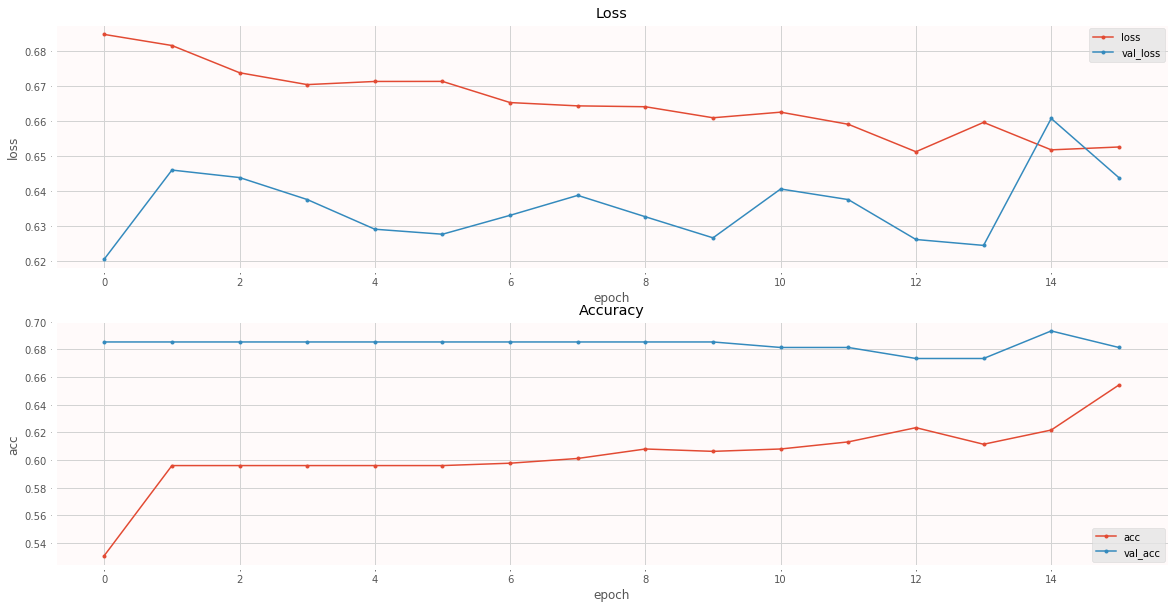

In [235]:
x = get_preprocessed_seq(x_train)
y = y_train
history, model = train_bilstm(x, y, wv_matrix)
plot_history(history)

In [236]:
def predict(sentences, model):
    x_test = tokenizer.texts_to_sequences(sentences)
    x_test = sequence.pad_sequences(x_test, maxlen=MAX_LEN)
    y_prob = model.predict_classes(x_test)
    y_pred = y_prob.squeeze()   
    return y_pred

In [239]:
y_pred = predict(x_test, model)
acc_score = accuracy_score(y_pred, y_test)
rocauc_score = roc_auc_score(y_pred, y_test)
print("Accuracy: {}\nROC AUC Score: {}".format(round(acc_score, 4), round(rocauc_score, 4)))

Accuracy: 0.6077
ROC AUC Score: 0.6092


In [205]:
confusion_matrix(y_pred, y_test)

array([[102,  37],
       [ 21,  49]], dtype=int64)